## データの準備

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
housing = load_boston()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,
                                                    train_size=0.75, test_size=0.25,
                                                    random_state=2018)

## 結果に再現性をもたせる

In [2]:
from tpot import TPOTRegressor

In [3]:
tpot = TPOTRegressor(generations=5, population_size=50,
                     verbosity=2, n_jobs=-1, random_state=2018)

In [4]:
import time
t0 = time.time()
tpot.fit(X_train, y_train)
print(time.time() - t0)

Generation 1 - Current best internal CV score: -13.39495565337504
Generation 2 - Current best internal CV score: -12.18439628126403
Generation 3 - Current best internal CV score: -12.18439628126403
Generation 4 - Current best internal CV score: -12.18439628126403
Generation 5 - Current best internal CV score: -11.19793954822236

Best pipeline: RandomForestRegressor(PolynomialFeatures(SelectFwe(input_matrix, alpha=0.046), degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=3, min_samples_split=2, n_estimators=100)
39.54600715637207


## 同じtransformを省略させる

In [5]:
tpot = TPOTRegressor(generations=5, population_size=50,
                     verbosity=2, n_jobs=-1, random_state=2018, memory='auto')

In [6]:
t0 = time.time()
tpot.fit(X_train, y_train)
print(time.time() - t0)

Generation 1 - Current best internal CV score: -13.39495565337504
Generation 2 - Current best internal CV score: -12.18439628126403
Generation 3 - Current best internal CV score: -12.18439628126403
Generation 4 - Current best internal CV score: -12.18439628126403
Generation 5 - Current best internal CV score: -11.19793954822236

Best pipeline: RandomForestRegressor(PolynomialFeatures(SelectFwe(input_matrix, alpha=0.046), degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=3, min_samples_split=2, n_estimators=100)
41.3427209854126


## 途中経過を随時保存する

In [7]:
dire = 'proc_folder'
tpot = TPOTRegressor(generations=5, population_size=50,
                     verbosity=2, n_jobs=-1, random_state=2018, periodic_checkpoint_folder=dire)

In [8]:
t0 = time.time()
tpot.fit(X_train, y_train)
print(time.time() - t0)

Generation 1 - Current best internal CV score: -13.39495565337504
Generation 2 - Current best internal CV score: -12.18439628126403
Generation 3 - Current best internal CV score: -12.18439628126403
Generation 4 - Current best internal CV score: -12.18439628126403
Generation 5 - Current best internal CV score: -11.19793954822236

Best pipeline: RandomForestRegressor(PolynomialFeatures(SelectFwe(input_matrix, alpha=0.046), degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=3, min_samples_split=2, n_estimators=100)
35.76456570625305


## 前回の続きからFittingする

### 一気に10世代やる

In [9]:
tpot = TPOTRegressor(generations=10, population_size=50,
                     verbosity=2, n_jobs=-1, random_state=2018)

In [10]:
t0 = time.time()
tpot.fit(X_train, y_train)
print(time.time() - t0)

Generation 1 - Current best internal CV score: -13.39495565337504
Generation 2 - Current best internal CV score: -12.18439628126403
Generation 3 - Current best internal CV score: -12.18439628126403
Generation 4 - Current best internal CV score: -12.18439628126403
Generation 5 - Current best internal CV score: -11.19793954822236
Generation 6 - Current best internal CV score: -11.19793954822236
Generation 7 - Current best internal CV score: -11.19793954822236
Generation 8 - Current best internal CV score: -11.19793954822236
Generation 9 - Current best internal CV score: -11.185374648364572
Generation 10 - Current best internal CV score: -11.185374648364572

Best pipeline: RandomForestRegressor(StandardScaler(PolynomialFeatures(SelectFwe(input_matrix, alpha=0.046), degree=2, include_bias=False, interaction_only=False)), bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=3, min_samples_split=2, n_estimators=100)
86.62028527259827


### 5世代の計算を2回やる

In [11]:
t0 = time.time()
tpot = TPOTRegressor(generations=5, population_size=50,
                     verbosity=2, n_jobs=-1, random_state=2018, warm_start=True)
tpot.fit(X_train, y_train)
print(time.time() - t0)

Generation 1 - Current best internal CV score: -13.39495565337504
Generation 2 - Current best internal CV score: -12.18439628126403
Generation 3 - Current best internal CV score: -12.18439628126403
Generation 4 - Current best internal CV score: -12.18439628126403
Generation 5 - Current best internal CV score: -11.19793954822236

Best pipeline: RandomForestRegressor(PolynomialFeatures(SelectFwe(input_matrix, alpha=0.046), degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=3, min_samples_split=2, n_estimators=100)
34.52070999145508


In [12]:
t0 = time.time()
tpot.fit(X_train, y_train)
print(time.time() - t0)

Generation 1 - Current best internal CV score: -11.19793954822236
Generation 2 - Current best internal CV score: -10.490260628437639
Generation 3 - Current best internal CV score: -10.490260628437639
Generation 4 - Current best internal CV score: -10.490260628437639
Generation 5 - Current best internal CV score: -10.490260628437639

Best pipeline: RandomForestRegressor(LassoLarsCV(PolynomialFeatures(SelectFwe(input_matrix, alpha=0.046), degree=2, include_bias=False, interaction_only=False), normalize=False), bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=3, min_samples_split=2, n_estimators=100)
64.9047622680664


## 各世代のCV scoreを出力する

In [13]:
import sys
sys.stdout = open('temp.txt', 'w')

In [14]:
tpot = TPOTRegressor(generations=30, population_size=50,
                     verbosity=2, n_jobs=-1, random_state=2018)
tpot.fit(X_train, y_train)

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=30,
       max_eval_time_mins=5, max_time_mins=None, memory=None,
       mutation_rate=0.9, n_jobs=-1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=50,
       random_state=2018, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

In [15]:
sys.stdout.close()
sys.stdout = sys.__stdout__

In [16]:
txt = open('temp.txt', 'r').read()

In [17]:
txt

'Warning: xgboost.XGBRegressor is not available and will not be used by TPOT.\n\nGeneration 1 - Current best internal CV score: -13.39495565337504\n\nGeneration 2 - Current best internal CV score: -12.18439628126403\n\nGeneration 3 - Current best internal CV score: -12.18439628126403\n\nGeneration 4 - Current best internal CV score: -12.18439628126403\n\nGeneration 5 - Current best internal CV score: -11.19793954822236\n\nGeneration 6 - Current best internal CV score: -11.19793954822236\n\nGeneration 7 - Current best internal CV score: -11.19793954822236\n\nGeneration 8 - Current best internal CV score: -11.19793954822236\n\nGeneration 9 - Current best internal CV score: -11.185374648364572\n\nGeneration 10 - Current best internal CV score: -11.185374648364572\n\nGeneration 11 - Current best internal CV score: -10.940434293847948\n\nGeneration 12 - Current best internal CV score: -10.142040391614035\n\nGeneration 13 - Current best internal CV score: -10.142040391614035\n\nGeneration 14

In [18]:
outs = txt.split('\n\n')

In [19]:
outs

['Warning: xgboost.XGBRegressor is not available and will not be used by TPOT.',
 'Generation 1 - Current best internal CV score: -13.39495565337504',
 'Generation 2 - Current best internal CV score: -12.18439628126403',
 'Generation 3 - Current best internal CV score: -12.18439628126403',
 'Generation 4 - Current best internal CV score: -12.18439628126403',
 'Generation 5 - Current best internal CV score: -11.19793954822236',
 'Generation 6 - Current best internal CV score: -11.19793954822236',
 'Generation 7 - Current best internal CV score: -11.19793954822236',
 'Generation 8 - Current best internal CV score: -11.19793954822236',
 'Generation 9 - Current best internal CV score: -11.185374648364572',
 'Generation 10 - Current best internal CV score: -11.185374648364572',
 'Generation 11 - Current best internal CV score: -10.940434293847948',
 'Generation 12 - Current best internal CV score: -10.142040391614035',
 'Generation 13 - Current best internal CV score: -10.142040391614035',


In [20]:
scores = [float(out.split(' ')[-1]) for out in outs[1:-1]]

In [21]:
scores

[-13.39495565337504,
 -12.18439628126403,
 -12.18439628126403,
 -12.18439628126403,
 -11.19793954822236,
 -11.19793954822236,
 -11.19793954822236,
 -11.19793954822236,
 -11.185374648364572,
 -11.185374648364572,
 -10.940434293847948,
 -10.142040391614035,
 -10.142040391614035,
 -10.142040391614035,
 -10.142040391614035,
 -10.142040391614035,
 -10.142040391614035,
 -10.142040391614035,
 -10.142040391614035,
 -10.142040391614035,
 -10.142040391614035,
 -10.142040391614035,
 -9.672317209541905,
 -9.672317209541905,
 -9.672317209541905,
 -9.672317209541905,
 -9.046123340035086,
 -9.046123340035086,
 -9.046123340035086,
 -9.046123340035086]

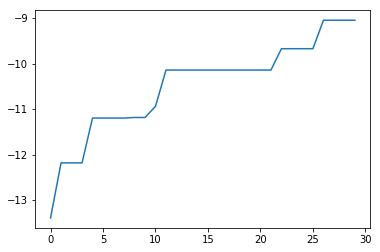

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scores)

In [23]:
def fit_tpot(tpot, X_train, y_train):
    import sys
    sys.stdout = open('temp.txt', 'w')
    tpot.fit(X_train, y_train)    
    sys.stdout.close()
    sys.stdout = sys.__stdout__    
    
    outs = open('temp.txt', 'r').read().split('\n\n')
    scores = [float(out.split(' ')[-1]) for out in outs[1:-1]]
    
    return tpot, scores

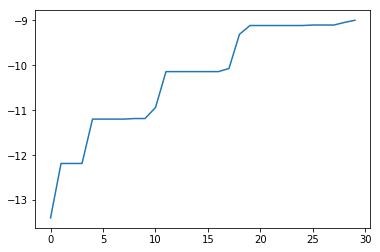

In [24]:
tpot = TPOTRegressor(generations=30, population_size=50,
                    verbosity=2, n_jobs=-1, random_state=2018)
tpot, scores = fit_tpot(tpot, X_train, y_train)
plt.plot(scores)

## 文字列からPipelineを生成

In [35]:
strs_pipeline = list(tpot.evaluated_individuals_.keys())

In [38]:
strs_pipeline[1]

'DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=6, DecisionTreeRegressor__min_samples_leaf=7, DecisionTreeRegressor__min_samples_split=13)'

In [45]:
from deap import creator
pipeline4deap = creator.Individual.from_string(strs_pipeline[1], tpot._pset)
pipeline4sklearn = tpot._toolbox.compile(expr=pipeline4deap)

In [46]:
pipeline4sklearn

Pipeline(memory=None,
     steps=[('decisiontreeregressor', DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=7,
           min_samples_split=13, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))])